Analysis of the MCMC optimization 

In [1]:
using DataFrames , CSV , Statistics
using Query
using PyPlot
using TSne
using Printf

## directory
rootdir = "/home/stephane/Science/GAIA/"
#rootdir = "/home/stephane/Science/cluster/GAIA/"
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/testfull2"

cd(wdir)

┌ Info: Precompiling Seaborn [d2ef9438-c967-53ab-8060-373fdd9e13eb]
└ @ Base loading.jl:1186


In [2]:
## Reading and joining the results from normal and full MCMC dbscan optimization.

mc1    = CSV.read("votlist.mcmc.csv" , delim = ";")
mc2    = CSV.read("votlist.mcmc.2.csv" , delim = ";")
mc     = vcat(mc1, mc2)
mcfull1 = CSV.read("votlist.mcmc.full.csv", delim = ";")
mcfull2 = CSV.read("votlist.mcmc.full.2.csv", delim = ";")
mcfull  = vcat(mcfull1, mcfull2)
mcj    = join(mc,mcfull, on = :votname, makeunique=true)

,votname,epsm,epsd,mneim,mneid,mclm,mcld,qcm,qcd,qnm,qnd,epsm_1,epsd_1,mneim_1,mneid_1,mclm_1,mcld_1,qcm_1,qcd_1,qnm_1,qnd_1,w3dm,w3dd,wvelm,wveld,whrdm,whrdd
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AH03 J0822-36.4-1.0deg.vot,4.14445,0.697091,7.87612,5.51462,15.6344,6.31867,1.75338,1.4814,845.665,1619.24,5.11061,0.991445,6.07892,4.06543,17.7306,6.1372,1.49253,0.0284506,13859.1,2885.55,5.39878,3.72498,3.55136,3.12078,2.26614,0.966988
2,Alessi 1-2.1deg.vot,2.5972,0.337568,7.98035,4.96053,16.4309,6.4616,1.93118,0.104514,160.895,47.0168,1.96993,0.511145,6.90043,4.17191,16.2051,6.02901,2.06855,0.0784554,185.084,48.178,3.41427,2.11167,7.99762,3.56632,2.0506,0.914408
3,Alessi 12-2.4deg.vot,2.36135,0.360011,8.50616,5.21141,16.3427,6.56897,2.30395,0.0855189,234.52,67.8692,2.02499,0.499447,7.44922,4.41792,17.6467,6.81384,2.31948,0.0977293,290.124,121.885,4.48411,2.03592,8.63144,2.54947,1.95928,0.835029
4,Alessi 13-15.9deg.vot,1.97031,0.440386,8.9657,5.45319,15.2647,6.4549,1.93446,0.0977608,54.4392,13.8243,1.97032,0.374212,7.98801,4.53389,17.9001,6.80905,2.04079,0.0579299,55.4172,11.4542,6.03637,2.31325,6.56022,2.63454,2.0204,0.958921
5,Alessi 19-2.4deg.vot,2.98782,1.11096,8.70097,7.52459,14.2797,5.65376,2.01927,1.26468,1555.44,4726.57,4.97887,1.02761,7.08125,4.59681,21.9058,5.68553,1.70428,0.0564405,45264.3,15946.9,5.49964,3.09258,1.68837,1.22537,2.48024,0.888036
6,Alessi 20-1.5deg.vot,2.06029,0.423221,9.05028,5.65059,16.9481,7.24447,2.57851,0.106681,228.567,72.2485,1.89006,0.438416,7.57542,4.60663,17.1788,6.73766,2.58471,0.108728,235.57,78.7792,5.03979,2.30864,6.37304,1.91068,2.05925,0.813244
7,Alessi 21-1.6deg.vot,2.69468,0.393744,7.2714,4.54395,15.9364,6.25632,2.11147,0.096966,177.788,55.0709,2.10974,0.486757,7.18482,4.23338,17.0073,6.27999,2.279,0.0735365,200.032,70.8877,3.52561,1.82618,8.50515,2.34117,2.04003,0.853029
8,Alessi 2-1.7deg.vot,2.83123,0.386362,8.1695,4.82943,17.1512,6.87771,2.08479,0.0836043,112.853,22.2714,2.25757,0.639092,7.8365,4.67522,17.8685,7.10634,2.12428,0.106081,142.25,39.5268,3.39288,1.91147,8.22364,3.19063,1.94329,0.883152
9,Alessi 3-2.2deg.vot,2.07674,0.362593,9.94539,6.08843,15.8864,6.5681,2.1158,0.0963156,133.664,37.375,1.70176,0.397934,7.92874,4.6728,17.7203,6.38789,2.27927,0.0751275,153.93,38.2787,4.09694,2.59092,9.47761,3.28613,2.0995,0.917955


In [3]:
sc1     = CSV.read("votlist.SCproperties.csv",delim = ";")
sc2     = CSV.read("votlist.SCproperties.2.csv",delim = ";")
sc      = vcat(sc1, sc2)
scfull1 = CSV.read("votlist.SCproperties.full.csv",delim = ";")
scfull2 = CSV.read("votlist.SCproperties.full.2.csv",delim = ";")
scfull  = vcat(scfull1, scfull2)
scj     = join(sc,scfull, on = :votname, makeunique=true)

,votname,nstars,distance,l,b,vl,vb,vrad,xdisp,ydisp,zdisp,vldisp,vbdisp,vraddisp,nstars_1,distance_1,l_1,b_1,vl_1,vb_1,vrad_1,xdisp_1,ydisp_1,zdisp_1,vldisp_1,vbdisp_1,vraddisp_1
,String⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,AH03 J0822-36.4-1.0deg.vot,274,482.796,254.872,0.393959,-21.9207,-4.95768,16.084,27.968,4.332,4.23978,5.95064,5.47353,20.4663,5165,757.457,254.976,0.302983,-27.206,-7.01768,26.9783,272.58,6.79531,6.94934,15.2532,9.35735,19.0951
2,Alessi 1-2.1deg.vot,166,465.324,122.822,-12.6407,16.3989,-6.96678,-5.92294,12.184,7.05744,4.06993,1.17804,1.07316,10.0507,178,465.488,122.809,-12.6715,16.3051,-6.92075,-5.93845,14.2506,7.3082,4.25791,1.00161,0.796881,9.60384
3,Alessi 12-2.4deg.vot,230,544.088,67.4508,-11.4344,-2.85726,-16.2187,3.18242,15.2794,4.87104,3.76035,1.07742,1.0589,14.8162,236,544.102,67.4639,-11.426,-2.89079,-16.2264,5.2948,15.5637,5.32524,3.97477,0.859671,0.919034,10.8815
4,Alessi 13-15.9deg.vot,55,104.597,237.677,-55.9278,1.10859,18.1381,18.935,3.78544,3.75736,2.0869,0.79029,0.577233,2.57862,53,104.369,237.836,-55.9756,1.06618,18.1623,16.8763,3.61082,3.45935,2.07472,0.759445,0.574098,1.01029
5,Alessi 19-2.4deg.vot,54,593.195,40.3436,12.6377,-19.4171,-5.72308,-13.5933,10.5855,5.52268,3.27965,1.30206,1.04895,6.76326,26288,636.509,40.35,12.5454,-16.6826,-4.16167,-13.638,241.73,14.2987,13.7161,25.3235,17.5234,30.2461
6,Alessi 20-1.5deg.vot,228,433.526,117.462,-3.76955,15.6124,-7.78073,-6.22729,12.3735,3.36106,3.16083,0.948935,0.975608,9.58831,211,433.735,117.485,-3.78227,15.6544,-7.72939,-5.10956,12.0481,3.12092,2.75358,0.905614,0.950342,9.62263
7,Alessi 21-1.6deg.vot,195,571.152,223.489,-0.092201,-13.0734,-9.78318,41.1322,17.7112,4.89533,4.19312,1.19632,1.34206,6.47805,198,571.44,223.484,-0.0860801,-13.1662,-9.98761,41.8898,19.2161,5.37006,4.15492,0.926319,0.991055,7.00709
8,Alessi 2-1.7deg.vot,106,628.646,152.297,6.34721,0.766818,-4.33118,-8.43253,14.6196,4.21263,2.92524,0.836697,0.903586,9.46703,130,628.941,152.39,6.33003,0.694843,-4.25317,-10.6923,17.3391,5.72313,3.38924,0.641653,0.779721,10.4937
9,Alessi 3-2.2deg.vot,122,280.213,257.553,-15.2584,-19.8081,-5.75232,2.08823,5.43361,3.59105,2.80544,1.0057,1.07721,4.67284,151,281.987,257.588,-15.2035,-19.8656,-5.76365,2.14782,8.60764,4.00565,3.24581,0.849926,0.949275,4.54651


In [4]:
println("## Summary :")
println("##")
println("## votable with dbscan-only :",size(sc))
println("## votable with dbscan-weighting :",size(scfull))
println("## Join votable :",size(scj))

## Summary :
##
## votable with dbscan-only :(1156, 14)
## votable with dbscan-weighting :(1107, 14)
## Join votable :(1109, 27)


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[5]:9
└ @ Core In[5]:9
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[5]:11
└ @ Core In[5]:11
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[5]:21
└ @ Core In[5]:21
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[5]:22
└ @ Core In[5]:22
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of do

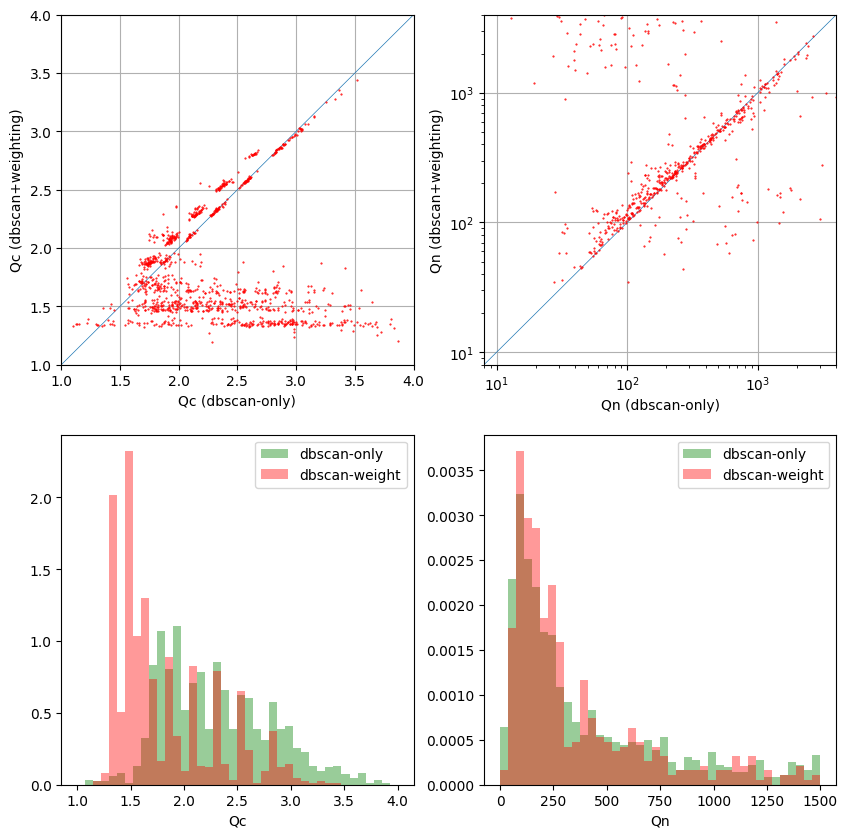

In [5]:
## Q comparisons

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10] ,linewidth = 0.5)
plot(mcj[:qcm],mcj[:qcm_1], ".r", markersize = 1)
# errorbar(mcj[:qcm],mcj[:qcm_1] , xerr=mcj[:qcd]./2,yerr= mcj[:qcd_1]./2 , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
ax[:set_xlim]([1.0,4.])
ax[:set_ylim]([1.0,4.])
xlabel("Qc (dbscan-only)")
ylabel("Qc (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([1.,30000.],[1.,30000], linewidth = 0.5)
xscale("log") ; yscale("log")
# errorbar(mcj[:qnm],mcj[:qnm_1] , xerr=mcj[:qnd]./2,yerr= mcj[:qnd_1]./2 , fmt = ".r" , capsize = 2 ,elinewidth=0.5)
plot(mcj[:qnm],mcj[:qnm_1], "r.", markersize = 1)
ax[:set_xlim]([8.,4000.])
ax[:set_ylim]([8.,4000.])
xscale("log")
yscale("log")
xlabel("Qn (dbscan-only)")
ylabel("Qn (dbscan+weighting)")

ax = subplot(223)
nbins = 40
h = plt[:hist](mcj[:qcm],nbins,range = [1.,4], color = "g", alpha=0.4 , label = "dbscan-only", density =true)
h = plt[:hist](mcj[:qcm_1],nbins,range = [1.,4], color = "r", alpha=0.4 , label = "dbscan-weight", density=true)
legend()
xlabel("Qc")

ax = subplot(224)
nbins = 40
h = plt[:hist](mcj[:qnm],nbins,range = [0,1500], color = "g", alpha=0.4 , label = "dbscan-only", density =true)
h = plt[:hist](mcj[:qnm_1],nbins,range = [0,1500], color = "r", alpha=0.4 , label = "dbscan-weight", density =true)
legend()
xlabel("Qn")

show()

In [6]:
## Statistics..

qc_only = median(mcj[:qcm]) ; qc_only_std = std(mcj[:qcm])
qc_wei  = median(mcj[:qcm_1]) ; qc_wei_std = std(mcj[:qcm_1])
qn_only = median(mcj[:qnm]) ; qn_only_std = std(mcj[:qnm])
qn_wei  = median(mcj[:qnm_1]) ; qn_wei_std = std(mcj[:qnm_1])
@printf("dbscan-only: \n")
@printf("Qc = %3.3f (+/- %3.3f) \n" , qc_only , qc_only_std)
@printf("Qn = %3.3f (+/- %3.3f) \n\n", qn_only, qn_only_std)
@printf("dbscan-weight: \n")
@printf("Qc = %3.3f (+/- %3.3f) \n",qc_wei , qc_wei_std)
@printf("Qn = %3.3f (+/- %3.3f) \n",qn_wei ,qn_wei_std)

dbscan-only: 
Qc = 2.229 (+/- 0.510) 
Qn = 302.577 (+/- 7322.971) 

dbscan-weight: 
Qc = 1.640 (+/- 0.465) 
Qn = 3466.585 (+/- 15303.696) 


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[7]:11
└ @ Core In[7]:11
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[7]:20
└ @ Core In[7]:20
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[7]:21
└ @ Core In[7]:21
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[7]:28
└ @ Core In[7]:28
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of 

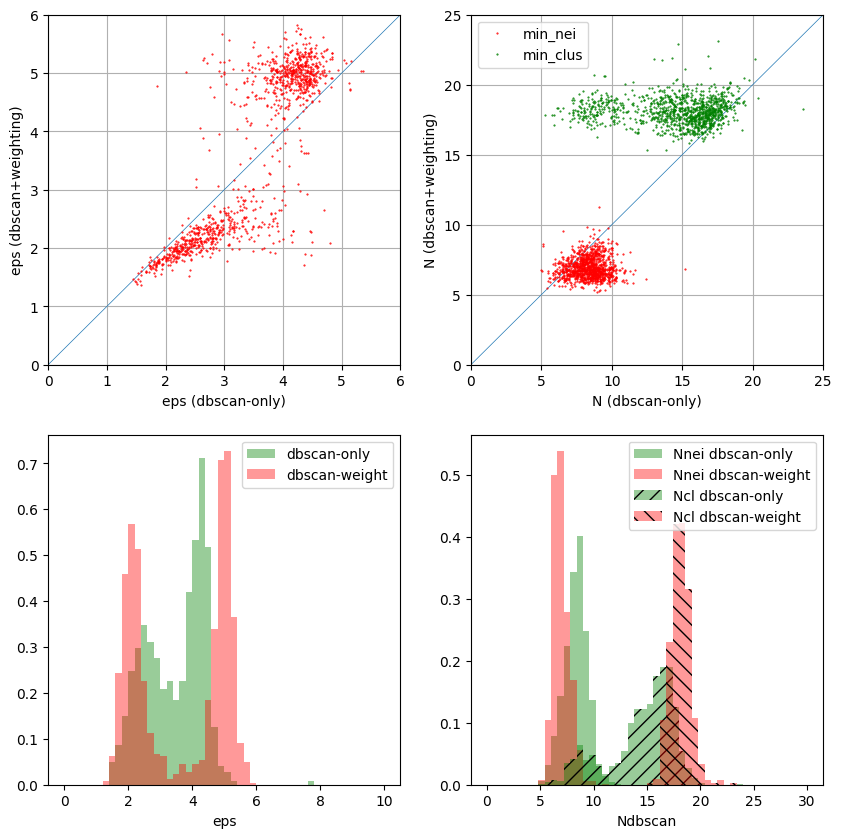

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[7]:38
└ @ Core In[7]:38


In [7]:
## comparison DBSCAN parameters

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10.],[0.,10], linewidth = 0.5)
plot(mcj[:epsm],mcj[:epsm_1] ,".r" , markersize = 1)
#ax[:set_xlim]([0.,6])
ax.set_xlim([0.,6])
ax[:set_ylim]([0.,6])
xlabel("eps (dbscan-only)")
ylabel("eps (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000], linewidth = 0.5)
plot(mcj[:mneim],mcj[:mneim_1] , ".r" , markersize = 1, label="min_nei")
plot(mcj[:mclm],mcj[:mclm_1] ,  ".g" , markersize = 1 , label="min_clus")
ax[:set_xlim]([0.,25])
ax[:set_ylim]([0.,25])
legend(loc="upper left")
xlabel("N (dbscan-only)")
ylabel("N (dbscan+weighting)")

ax = subplot(223)
nbins = 50
h = plt[:hist](mcj[:epsm],nbins,range = [0.,10.], color = "g", alpha=0.4 , label = "dbscan-only",density=true)
h = plt[:hist](mcj[:epsm_1],nbins,range = [0., 10.] , color = "r", alpha=0.4 , label = "dbscan-weight",density=true)
legend()
xlabel("eps")

ax = subplot(224)
nbins = 50
h = plt[:hist](mcj[:mneim],nbins, range = [0,30],  color = "g", alpha=0.4 , label = "Nnei dbscan-only",density=true)
h = plt[:hist](mcj[:mneim_1],nbins, range = [0,30], color = "r", alpha=0.4 , label = "Nnei dbscan-weight",density=true)
h = plt[:hist](mcj[:mclm],nbins, range = [0,30], color = "g", hatch="//", alpha=0.4 , label = "Ncl dbscan-only",density=true)
h = plt[:hist](mcj[:mclm_1],nbins, range = [0,30], color = "r", hatch="\\\\", alpha=0.4 , label = "Ncl dbscan-weight",density=true)
legend(loc="upper right")
xlabel("Ndbscan")
show()

Analysing the dbscan parameters..

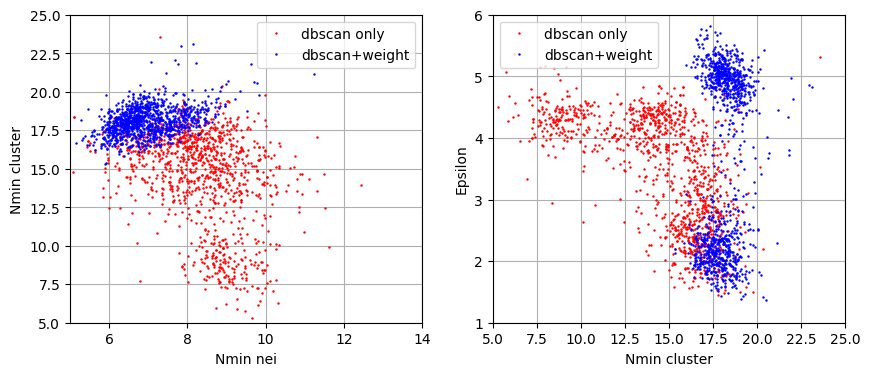

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[8]:7
└ @ Core In[8]:7
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[8]:8
└ @ Core In[8]:8
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[8]:17
└ @ Core In[8]:17
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[8]:18
└ @ Core In[8]:18


In [8]:
fig = figure(figsize=(10,4))

ax = subplot(121)
grid("on") 
plot(mcj[:mneim],mcj[:mclm], ".r", markersize = 1.5,label = "dbscan only")
plot(mcj[:mneim_1],mcj[:mclm_1], ".b",markersize = 1.5, label = "dbscan+weight")
ax[:set_xlim]([5.,14])
ax[:set_ylim]([5.,25])
xlabel("Nmin nei")
ylabel("Nmin cluster")
legend(loc="upper right")

ax = subplot(122)
grid("on") 
plot(mcj[:mclm],mcj[:epsm], ".r", markersize = 1.5,label = "dbscan only")
plot(mcj[:mclm_1],mcj[:epsm_1], ".b", markersize = 1.5,label = "dbscan+weight")
ax[:set_xlim]([5.,25])
ax[:set_ylim]([1.,6])
xlabel("Nmin cluster")
ylabel("Epsilon")
legend(loc="upper left")

show()


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[9]:5
└ @ Core In[9]:5
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[9]:8
└ @ Core In[9]:8
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[9]:13
└ @ Core In[9]:13
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[9]:14
└ @ Core In[9]:14


Weights: median


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[9]:15
└ @ Core In[9]:15


W3d  : 4.659 
Wvel : 6.266 
Whrd : 2.193 


## Filtering on epsilon/mincl and xdisp/distance...
## Weights: median
N total: 1107-N filt.: 388

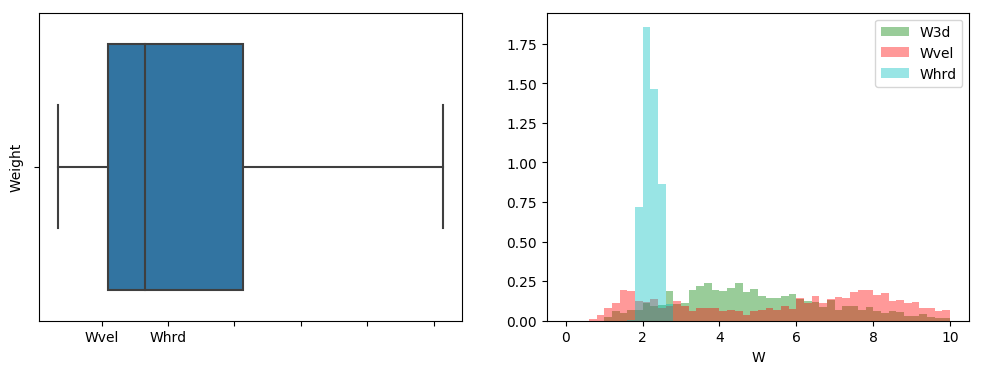


ϵ           : 2.113 
min cluster : 17.670 
min nei     : 7.234 
W3d         : 4.162 
Wvel        : 7.907 
Whrd        : 2.051 


In [9]:
### Weighting stats ..
fig = figure(figsize=(12,4))

ax = subplot(121)
ax[:set_ylim]([0.,10.])
data = [mcfull[:w3dm] ,mcfull[:wvelm] , mcfull[:whrdm]]
boxplot(data)
ax[:set_xticklabels](["W3d","Wvel","Whrd"])
ylabel("Weight")

ax = subplot(122)
nbins = 50
h = plt[:hist](mcfull[:w3dm],nbins,range = [0.,10.], color = "g", alpha=0.4 , label = "W3d",density=true)
h = plt[:hist](mcj[:wvelm],nbins,range = [0., 10.] , color = "r", alpha=0.4 , label = "Wvel",density=true)
h = plt[:hist](mcj[:whrdm],nbins,range = [0., 10.] , color = "c", alpha=0.4 , label = "Whrd",density=true)

legend()
xlabel("W")
show()
println("Weights: median")
@printf("W3d  : %3.3f \n",median(mcfull[:w3dm]))
@printf("Wvel : %3.3f \n",median(mcfull[:wvelm]))
@printf("Whrd : %3.3f \n",median(mcfull[:whrdm]))

println("\n\n## Filtering on epsilon/mincl and xdisp/distance...")
indx = mcfull[:epsm] ./ mcfull[:mclm]  .+ scfull[:xdisp] ./ scfull[:distance] .< 0.2
println("## Weights: median")
ntot =  length(mcfull[:w3dm])
nfilt = length(mcfull[indx,:w3dm])
println("N total: $ntot-N filt.: $nfilt")
@printf("ϵ           : %3.3f \n",median(mcfull[indx,:epsm]))
@printf("min cluster : %3.3f \n",median(mcfull[indx,:mclm]))
@printf("min nei     : %3.3f \n",median(mcfull[indx,:mneim]))   
@printf("W3d         : %3.3f \n",median(mcfull[indx,:w3dm]))
@printf("Wvel        : %3.3f \n",median(mcfull[indx,:wvelm]))
@printf("Whrd        : %3.3f \n",median(mcfull[indx,:whrdm]))

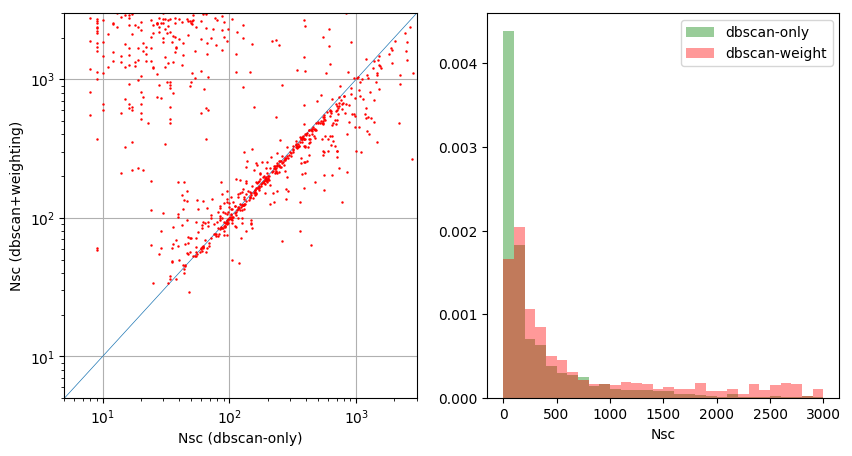

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[10]:9
└ @ Core In[10]:9
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[10]:10
└ @ Core In[10]:10
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[10]:18
└ @ Core In[10]:18
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[10]:19
└ @ Core In[10]:19


In [10]:
## Number of stars in the final SC

fig = figure(figsize=(10,5))

ax = subplot(121)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:nstars], scj[:nstars_1], ".r", markersize = 1.5,)
ax[:set_xlim]([5.,3000.])
ax[:set_ylim]([5.,3000.])
xlabel("Nsc (dbscan-only)")
ylabel("Nsc (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(122)
nbins = 30
h = plt[:hist](scj[:nstars],nbins,range = [0,3000], color = "g", alpha=0.4 , label = "dbscan-only" , density=true)
h = plt[:hist](scj[:nstars_1],nbins,range = [0,3000], color = "r", alpha=0.4 , label = "dbscan-weight", density=true)
legend()
xlabel("Nsc")

show()

###  Comparison of the SC properties for the optimization with DBSCAN only and DBSCAN+weighting 

<br>

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:9
└ @ Core In[11]:9
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:10
└ @ Core In[11]:10
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:18
└ @ Core In[11]:18
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:19
└ @ Core In[11]:19
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in fav

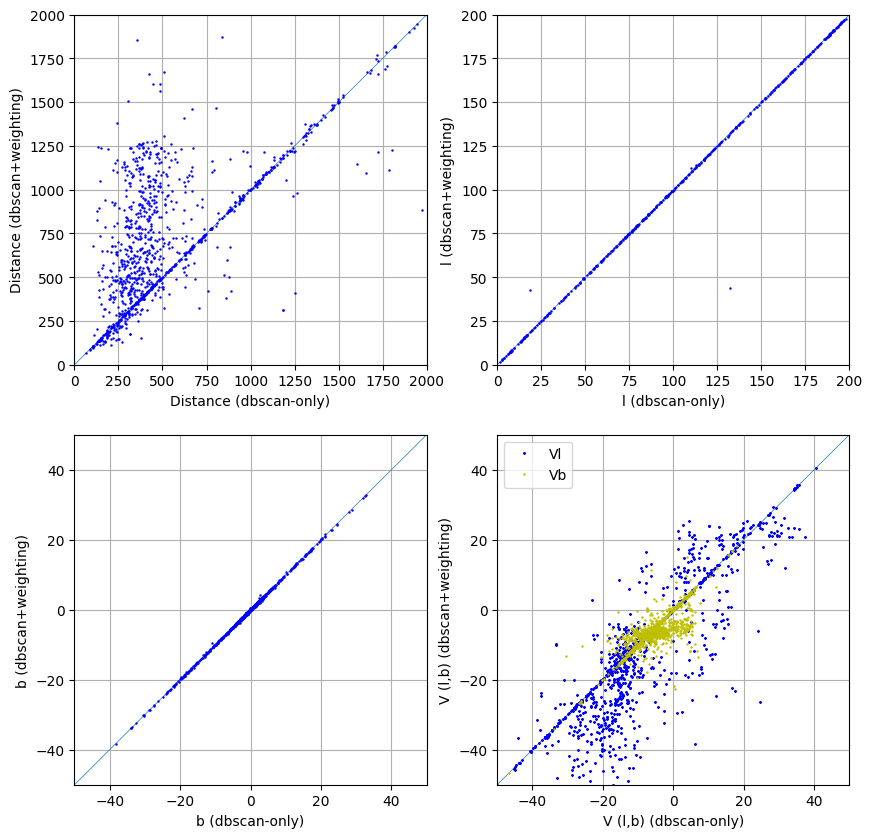

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:38
└ @ Core In[11]:38
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:39
└ @ Core In[11]:39


In [11]:
## Distance , position, velocity

fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:distance], scj[:distance_1], ".b" , markersize = 1.5)
ax[:set_xlim]([0.,2000.])
ax[:set_ylim]([0.,2000.])
xlabel("Distance (dbscan-only)")
ylabel("Distance (dbscan+weighting)")

ax = subplot(222)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:l], scj[:l_1], ".b", markersize = 1.5)
ax[:set_xlim]([0.,200.])
ax[:set_ylim]([0.,200.])
xlabel("l (dbscan-only)")
ylabel("l (dbscan+weighting)")

ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:b], scj[:b_1], ".b", markersize = 1.5)
ax[:set_xlim]([-50.,50.])
ax[:set_ylim]([-50.,50.])
xlabel("b (dbscan-only)")
ylabel("b (dbscan+weighting)")

ax = subplot(224)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot(scj[:vl], scj[:vl_1], "*b", label = "Vl", markersize = 1.5)
plot(scj[:vb], scj[:vb_1], "+y", label = "Vb", markersize = 1.5)
legend()
ax[:set_xlim]([-50.,50.])
ax[:set_ylim]([-50.,50.])
xlabel("V (l,b) (dbscan-only)")
ylabel("V (l,b) (dbscan+weighting)")

show()

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[12]:8
└ @ Core In[12]:8
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[12]:9
└ @ Core In[12]:9


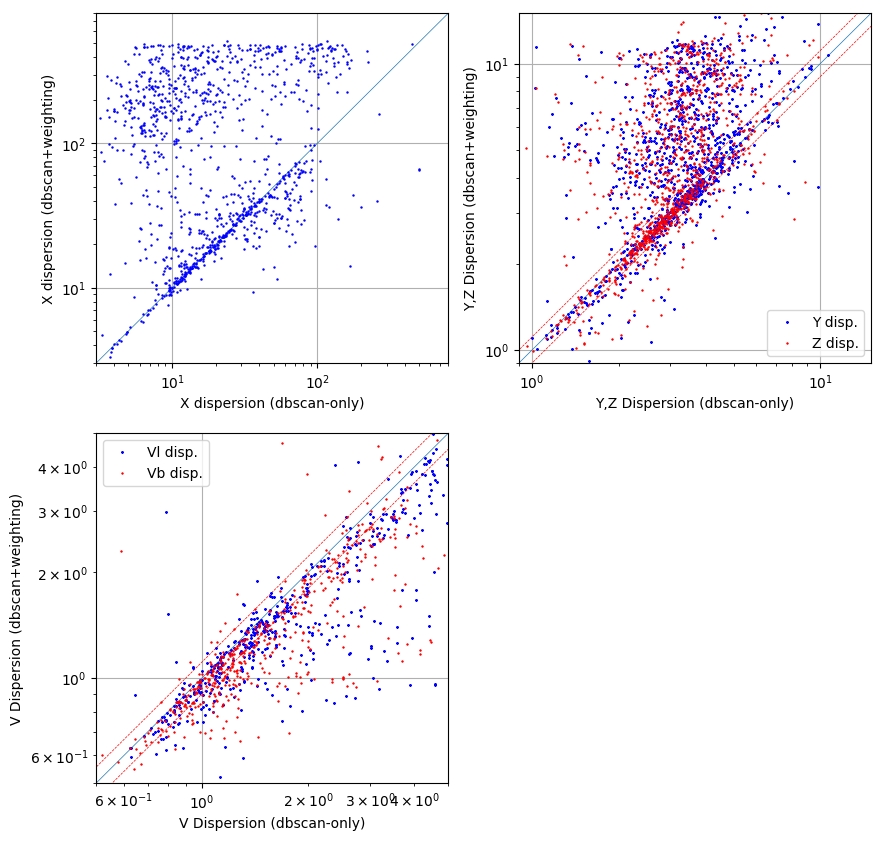

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[12]:23
└ @ Core In[12]:23
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[12]:24
└ @ Core In[12]:24
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[12]:38
└ @ Core In[12]:38
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[12]:39
└ @ Core In[12]:39


In [12]:
## Dispersions ...
fig = figure(figsize=(10,10))

ax = subplot(221)
grid("on") 
plot([0.,10000.],[0.,10000] ,linewidth = 0.5)
plot(scj[:xdisp], scj[:xdisp_1], ".b", markersize = 1.5)
ax[:set_xlim]([3,800.])
ax[:set_ylim]([3,800.])
xlabel("X dispersion (dbscan-only)")
ylabel("X dispersion (dbscan+weighting)")
xscale("log")
yscale("log")

ax = subplot(222)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:ydisp], scj[:ydisp_1], "*b", label = "Y disp.", markersize = 1.5)
plot(scj[:zdisp], scj[:zdisp_1], "+r", label = "Z disp.", markersize = 1.5)
legend()
ax[:set_xlim]([0.9,15.])
ax[:set_ylim]([0.9,15.])
xlabel("Y,Z Dispersion (dbscan-only)")
ylabel("Y,Z Dispersion (dbscan+weighting)")
xscale("log") ; yscale("log")


ax = subplot(223)
grid("on") 
plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
plot([-10000.,10000.],[-9000.,9000] ,"r--" ,linewidth = 0.5)
plot([-9000.,9000],[-10000.,10000.] ,"r--" ,linewidth = 0.5)
plot(scj[:vldisp], scj[:vldisp_1], "*b", label = "Vl disp.", markersize = 1.5)
plot(scj[:vbdisp], scj[:vbdisp_1], "+r", label = "Vb disp.", markersize = 1.5)
legend(loc="upper left")
ax[:set_xlim]([0.5, 5.])
ax[:set_ylim]([0.5, 5.])
xlabel("V Dispersion (dbscan-only)")
ylabel("V Dispersion (dbscan+weighting)")
xscale("log") ;yscale("log")

show()

### Metric for the QA of the extracted SCs

Intent to make QA of the extracted SCs using different parameters like:
* epsilon values
* etc

In [13]:
## plot the filtered data on different variables

function plot_sc(aj)
    fig = figure(figsize=(12,10))
    grid("on")
    
    ax = subplot(331)
    plot(aj[:nstars],aj[:nstars_1], ".r", markersize = 2.0)
    plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
    ax[:set_xlim]([50.0,3000.])
    ax[:set_ylim]([50.0,3000.])
    xlabel("Nstars")
    ylabel("Nstars_full")
    xscale("log") ; yscale("log")

    ax = subplot(332)
    plot(aj[:qcm],aj[:qnm], ".r", markersize = 2,label="simple")
    plot(aj[:qcm_1],aj[:qnm_1], ".b", markersize = 2, label="full")
    ax[:set_xlim]([1.0,4.])
    ax[:set_ylim]([100.0,2000.])
    xlabel("Qc")
    ylabel("Qn")
    legend()
    yscale("log")
    
    ax = subplot(333)
    plot(aj[:distance],aj[:distance_1], ".r", markersize = 2)
    plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
    ax[:set_xlim]([50., 2000.])
    ax[:set_ylim]([50., 2000.])
    xlabel("distance")
    ylabel("distance_full")
    xscale("log") ; yscale("log")  

    ax = subplot(334)
    plot(aj[:vldisp],aj[:vbdisp], ".r", markersize = 2,label="simple")
    plot(aj[:vldisp_1],aj[:vbdisp_1], ".b", markersize = 2, label="full") 
    plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
    ax[:set_xlim]([0.5,10.])
    ax[:set_ylim]([0.5,10.])
    xlabel("Vl disp.")
    ylabel("Vb disp.")
    xscale("log") ; yscale("log") 
    legend()
    
    ax = subplot(335)
    plot(aj[:ydisp],aj[:zdisp], ".r", markersize = 2,label="simple")
    plot(aj[:ydisp_1],aj[:zdisp_1], ".b", markersize = 2, label="full") 
    plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
    ax[:set_xlim]([0.5,15.])
    ax[:set_ylim]([0.5,15.])
    xlabel("Y disp.")
    ylabel("Z disp.")
    xscale("log") ; yscale("log")
    legend()
    
    ax = subplot(336)
    plot(aj[:nstars],aj[:vbdisp], ".r", markersize = 2,label="simple")
    plot(aj[:nstars_1],aj[:vbdisp_1], ".b", markersize = 2, label="full") 
    ax[:set_xlim]([20,5000.])
    ax[:set_ylim]([0.3,15.])
    xlabel("Nstars")
    ylabel("Vb disp.")
    xscale("log") ; yscale("log") 
    legend()
    
    ax = subplot(337)
    plot(aj[:distance],aj[:xdisp], ".r", markersize = 2,label="simple")
    plot(aj[:distance_1],aj[:xdisp_1], ".b", markersize = 2, label="full") 
    ax[:set_xlim]([50,1500.])
    ax[:set_ylim]([1,100.])
    xlabel("Distance")
    ylabel("X disp.")
    #xscale("log") ; yscale("log") 
    legend()
    
    ax = subplot(338)
    plot(aj[:epsm] ./ aj[:mclm], aj[:xdisp] ./ aj[:distance], ".r", markersize = 2.0,label="simple")
    plot(aj[:epsm_1] ./ aj[:mclm_1], aj[:xdisp_1] ./ aj[:distance_1], ".b", markersize = 2, label="full") 
    ax[:set_xlim]([0., 0.3])
    ax[:set_ylim]([0.,0.4])
    xlabel("ϵ / Ncl")
    ylabel("X disp. / Distance")
    #xscale("log") ; yscale("log") 
    legend()
    
    ax = subplot(339)
    plot(aj[:ydisp],aj[:ydisp_1], ".r" , markersize = 2,label="Y")
    plot(aj[:zdisp],aj[:zdisp_1], ".g" , markersize = 2,label="Z")
    plot([-10000.,10000.],[-10000.,10000] ,linewidth = 0.5)
    ax[:set_xlim]([0.9,15.])
    ax[:set_ylim]([0.9,15.])
    xlabel("Disp. simple")
    ylabel("Disp. full")
    xscale("log") ; yscale("log")
    legend()
    
    return()
end

plot_sc (generic function with 1 method)

In [14]:
function plot_sub(subplt , subset , crange , cmap)
    A = convert(Array{Float64}, subset )
    X = (A .- mean(A, dims=1)) ./ std(A, dims=1)
    Y = tsne(X, 2, 40, 2000, 20.0 , progress = false)
    
    ax = subplot(subplt)
    scatter(Y[:,1],Y[:,2], s = 5.0 , c = crange , cmap = cmap)
    xlabel("a1")
    ylabel("a2")
    colorbar()

end

#######################
function plot_tsne(aj , asimple, cmap = "gist_stern")
    fig = figure(figsize=(10,8))
    grid("on")
    
    ### 221
    subset = @from i in asimple begin
        @let a1 = i.distance
        @let a2 = i.l
        @let a3 = i.b
        @let a4 = i.vl
        @let a5 = i.vb
        @let a6 = i.xdisp
        @let a7 = i.ydisp
        @let a8 = i.zdisp
        @let a9 = i.vldisp
        @let a10 = i.vbdisp
        @let a11 = i.nstars
        @let a12 = i.epsm
        @let a13 = i.mneim
        @let a14 = i.mclm
        @let a15 = i.qcm
        @let a16 = i.qnm
        @select {A1 = a1 , A2=a2 , A3=a3, A4=a3, A5=a5, A6=a6, A7=a7, A8=a8, 
        A9=a9, A10=a10, A11=a11, A12=a12, A13=a13, A14=a14 , A15=a15 , A16=a16}
        @collect DataFrame
    end
    cr =  asimple[:epsm] ./  asimple[:mclm]
    plot_sub(221, subset, cr , cmap)
    

    ## 222
    subset = @from i in aj begin
        @let a1 = i.distance_1
        @let a2 = i.l_1
        @let a3 = i.b_1
        @let a4 = i.vl_1
        @let a5 = i.vb_1
        @let a6 = i.xdisp_1
        @let a7 = i.ydisp_1
        @let a8 = i.zdisp_1
        @let a9 = i.vldisp_1
        @let a10 = i.vbdisp_1
        @let a11 = i.nstars_1
        @let a12 = i.epsm_1
        @let a13 = i.mneim_1
        @let a14 = i.mclm_1
        @let a15 = i.qcm_1
        @let a16 = i.qnm_1
        @let a17 = i.w3dm
        @let a18 = i.wvelm
        @let a19 = i.whrdm
        @select {A1 = a1 , A2=a2 , A3=a3, A4=a3, A5=a5, A6=a6, A7=a7, A8=a8, 
        A9=a9, A10=a10, A11=a11, A12=a12, A13=a13, A14=a14 , A15=a15 , A16=a16, 
        A17=a17,A18=a18, A19=a19}
        @collect DataFrame
    end
    cr =  aj[:epsm_1] ./ aj[:mclm_1]   
    plot_sub(222, subset, cr , cmap)
    
    
    ### 223
    subset = @from i in aj begin
        @let a1 = i.ydisp_1
        @let a2 = i.zdisp_1
        @let a3 = i.xdisp_1   
        @let a4 = i.vbdisp_1
        @let a5 = i.vldisp_1
        @let a6 = i.epsd_1
        @let a7 = i.qcd_1
        @let a8 = i.qnd_1
        @let a9 = i.w3dd
        @let a10 = i.wveld
        @let a11 = i.whrdd
        @select {A1 = a1 , A2=a2 , A3=a3, A4=a3, A5=a5, A6=a6, A7=a7, A8=a8, A9=a9, A10=a10, A11=a11}   
        @collect DataFrame
    end
    cr = aj[:epsm] 
    plot_sub(223, subset, cr , cmap)
    

    ### 224
    subset = @from i in asimple begin
        @let a1 = i.xdisp / i.distance
        @let a2 = i.epsm / i.mclm
        @let a3 = i.zdisp / i.ydisp   
        @let a4 = i.vbdisp^2 * i.ydisp * i.zdisp
        @let a5 = i.qcm 
        @let a6 = i.qnm
        @let a7 = i.qcd
        @let a8 = i.qnd
        @select {A1 = a1 , A2=a2 , A3=a3, A4=a3, A5=a5, A6=a6 , A7=a7, A8=a8}
        @collect DataFrame
    end
    cr = asimple[:epsm]
    plot_sub(224, subset, cr , cmap)
       
end

plot_tsne (generic function with 2 methods)

starting ...
# N selected
(461, 53)


┌ Warning: `convert(::Type{Array{T}}, df::AbstractDataFrame) where T` is deprecated, use `convert(Matrix{T}, df)` instead.
│   caller = plot_sub(::Int64, ::DataFrame, ::Array{Float64,1}, ::String) at In[14]:2
└ @ Main ./In[14]:2
┌ Warning: implicit `dims=2` argument now has to be passed explicitly to specify that distances between columns should be computed
│   caller = ip:0x0
└ @ Core :-1
┌ Warning: `convert(::Type{Array{T}}, df::AbstractDataFrame) where T` is deprecated, use `convert(Matrix{T}, df)` instead.
│   caller = plot_sub(::Int64, ::DataFrame, ::Array{Union{Missing, Float64},1}, ::String) at In[14]:2
└ @ Main ./In[14]:2
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_sc(::DataFrame) at In[13]:10
└ @ Main ./In[13]:10
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements shoul

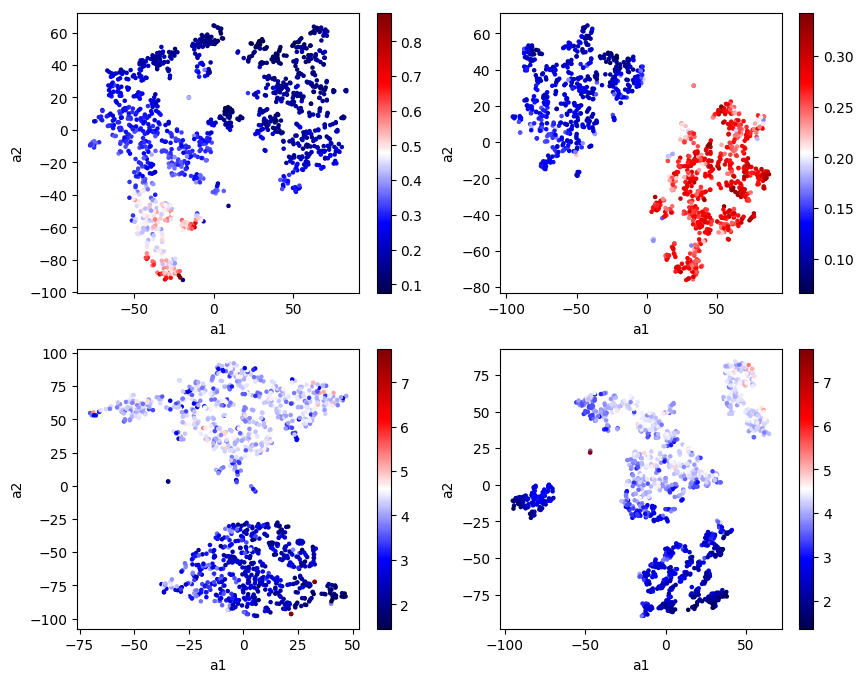

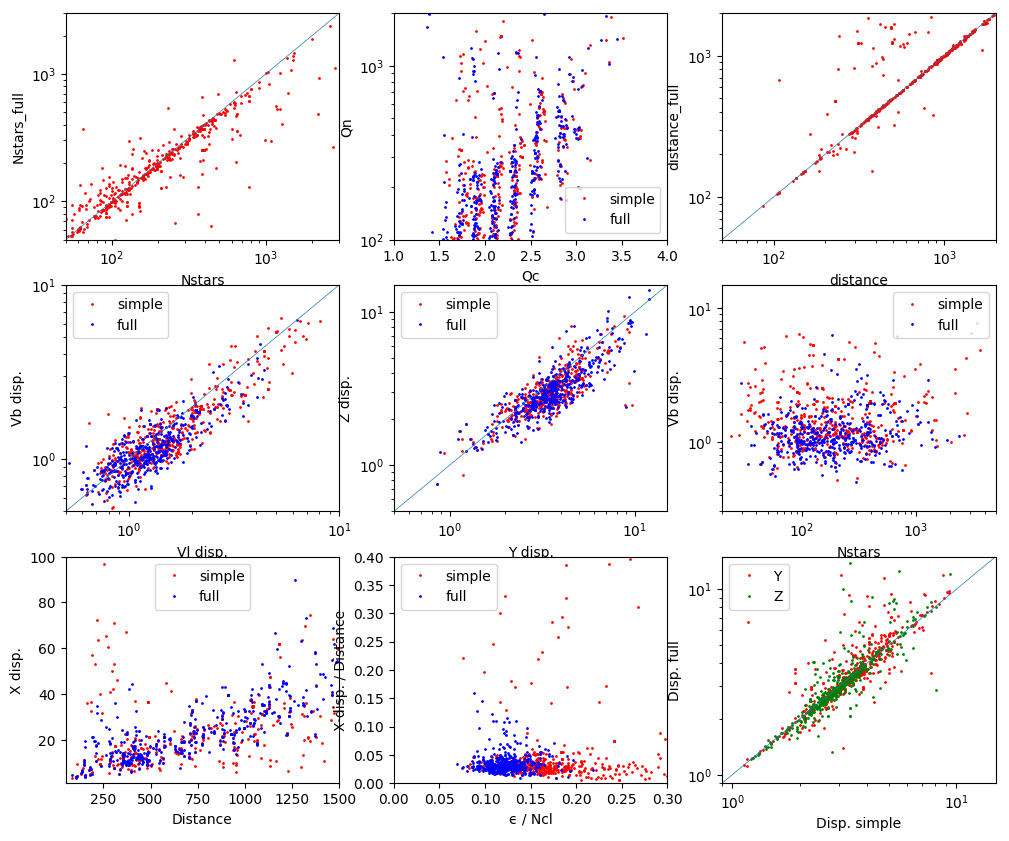

ending...


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_sc(::DataFrame) at In[13]:81
└ @ Main ./In[13]:81
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_sc(::DataFrame) at In[13]:91
└ @ Main ./In[13]:91
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = plot_sc(::DataFrame) at In[13]:92
└ @ Main ./In[13]:92


In [15]:
## all data joint
println("starting ...")
asimple = join(mc, sc, on = :votname, makeunique=true)
aj  = join(mcj, scj, on = :votname, makeunique=true)

## filter on epsilon
x = @from i in aj begin
    @where (i.xdisp_1 / i.distance_1)+(i.epsm_1 / i.mclm_1) < 0.25
    @select i
    @collect DataFrame
end

println("# N selected")
println(size(x))

plot_tsne(aj , asimple, "seismic")
plot_sc(x)
println("ending...")

### QA metric

Distribution of the criterion for the QA metric/selection

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[16]:17
└ @ Core In[16]:17
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[16]:18
└ @ Core In[16]:18
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[16]:24
└ @ Core In[16]:24
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[16]:25
└ @ Core In[16]:25


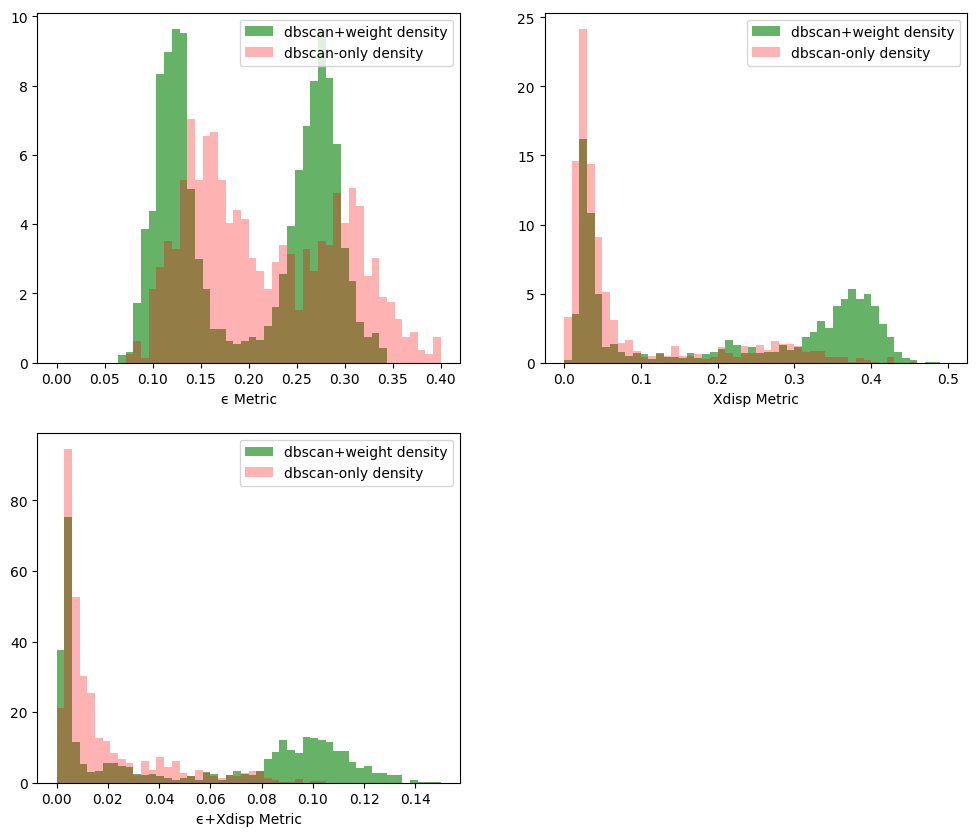

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[16]:33
└ @ Core In[16]:33
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[16]:34
└ @ Core In[16]:34


,votname,nstars,distance,l,b,vl,vb,vrad,xdisp,ydisp,zdisp,vldisp,vbdisp,vraddisp
,String⍰,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Alessi 19-2.4deg.vot,26288,636.509,40.35,12.5454,-16.6826,-4.16167,-13.638,241.73,14.2987,13.7161,25.3235,17.5234,30.2461
2,ASCC 119-1.1deg.vot,12017,944.453,97.6288,-8.33326,-18.0855,-10.8171,-20.2237,370.128,9.21245,9.1308,31.4839,15.9078,22.2259
3,ASCC 26-1.0deg.vot,4381,710.647,206.36,3.08051,14.7174,-9.51234,22.3019,260.802,6.56025,6.5659,21.8689,16.8494,32.6606
4,ASCC 4-1.1deg.vot,7783,720.824,123.138,-1.28649,5.29212,-8.20379,-23.4202,272.666,6.96721,7.0287,27.4383,15.8141,25.3448
5,ASCC 48-1.0deg.vot,10954,929.567,257.411,1.62616,-30.4712,-8.53952,27.5607,372.248,8.64179,8.40679,27.909,14.6109,22.9792
6,ASCC 54-1.0deg.vot,25282,1272.97,277.897,-0.902165,-52.2516,-7.2637,16.4528,477.449,11.7858,11.7143,32.8866,15.9697,20.7738
7,ASCC 71-1.2deg.vot,16504,904.706,299.994,-4.78284,-39.6676,-6.51762,2.98089,359.207,9.67808,9.55239,23.0653,13.817,23.4622
8,Basel 11A-1.1deg.vot,11855,1039.74,228.293,-0.769568,-5.87851,-7.91802,30.3776,416.194,9.92237,10.0454,26.1713,16.37,27.8593
9,Basel 11B-1.0deg.vot,4083,675.806,187.427,-1.09019,22.6613,-6.90996,11.9608,250.268,6.1257,6.34083,18.4132,15.8004,31.3262


In [16]:
x = @from i in aj begin
    @let votname=i.votname
    @let a1 = i.epsm_1 / i.mclm_1
    @let a2 = i.epsm / i.mclm
    @let a3 = i.xdisp_1
    @let a4 = i.distance
    @let a5 = i.xdisp_1 / i.distance_1
    @let a6 = i.xdisp / i.distance
    @let a7 = i.epsm_1 / i.mclm_1 + i.xdisp / i.distance
    @select {Votname=votname,A1 = a1 , A2=a2, A3=a3,A4=a4 , A5=a5, A6=a6, A7=a7}
    @collect DataFrame
end

fig = figure(figsize=(12,10))
subplot(221)
nbins = 50
h = plt[:hist](x[:A1],nbins,range = [0,0.4], color = "g",  label = "dbscan+weight density" , alpha=0.6 , density =true)
h = plt[:hist](x[:A2],nbins,range = [0,0.4], color = "r",  label = "dbscan-only density" , alpha=0.3 , density =true)
legend()
xlabel("ϵ Metric")

subplot(222)
nbins = 50
h = plt[:hist](x[:A5],nbins,range = [0,0.5], color = "g",  label = "dbscan+weight density" , alpha=0.6 , density =true)
h = plt[:hist](x[:A6],nbins,range = [0,0.5], color = "r",  label = "dbscan-only density" , alpha=0.3 , density =true)
legend()
xlabel("Xdisp Metric")

subplot(223)
nbins = 50
m1 = x[:A1] .* x[:A5]
m2 = x[:A2] .* x[:A6]
h = plt[:hist](m1,nbins,range = [0,0.15], color = "g",  label = "dbscan+weight density" , alpha=0.6 , density =true)
h = plt[:hist](m2,nbins,range = [0,0.15], color = "r",  label = "dbscan-only density" , alpha=0.3 , density =true)
legend()
xlabel("ϵ+Xdisp Metric")

show()

x[x[:A1].<0.1,:]
scfull[mcfull[:wvelm] .< 2, :]
